In [15]:
import os
import tarfile
import urllib.request
import pandas as pd

In [16]:
load_humr_data = pd.read_csv("C:/Users/alt98/Desktop/Machine Learning Project/Employee_Retention/Dataset_humR.csv")

In [17]:
humr_data= load_humr_data.copy()
#make sure it works
humr_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,no,yes,no,sales,low
1,0.80,0.86,5,262,6,no,yes,no,sales,medium
2,0.11,0.88,7,272,4,no,yes,no,sales,medium
3,0.72,0.87,5,223,5,no,yes,no,sales,low
4,0.37,0.52,2,159,3,no,yes,no,sales,low


In [18]:
#change all attribute names to lower case
humr_data.columns = humr_data.columns.str.lower()

In [19]:
#let's check to see if there are any null values
humr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spent_company       0
work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [20]:
#let's check the dtypes
humr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spent_company         int64
work_accident             object
left                      object
promotion_last_5years     object
sales                     object
salary                    object
dtype: object

In [21]:
#change objects to categorical data
object_cols = humr_data.select_dtypes(include=['object']).columns
humr_data[object_cols] = humr_data[object_cols].astype('category')
#check the data types again
humr_data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
time_spent_company          int64
work_accident            category
left                     category
promotion_last_5years    category
sales                    category
salary                   category
dtype: object

In [22]:
categorical_columns = humr_data.select_dtypes(include='category')  # Select category-type columns
value_counts = {col: categorical_columns[col].value_counts() for col in categorical_columns.columns}

# Print the value counts for each column
for col, counts in value_counts.items():
    print(f"Value counts for column '{col}':")
    print(counts)
    print()



Value counts for column 'work_accident':
work_accident
no     12830
yes     2169
Name: count, dtype: int64

Value counts for column 'left':
left
no     11428
yes     3571
Name: count, dtype: int64

Value counts for column 'promotion_last_5years':
promotion_last_5years
no     14680
yes      319
Name: count, dtype: int64

Value counts for column 'sales':
sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Value counts for column 'salary':
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64



In [23]:
#look at numerical columns
humr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


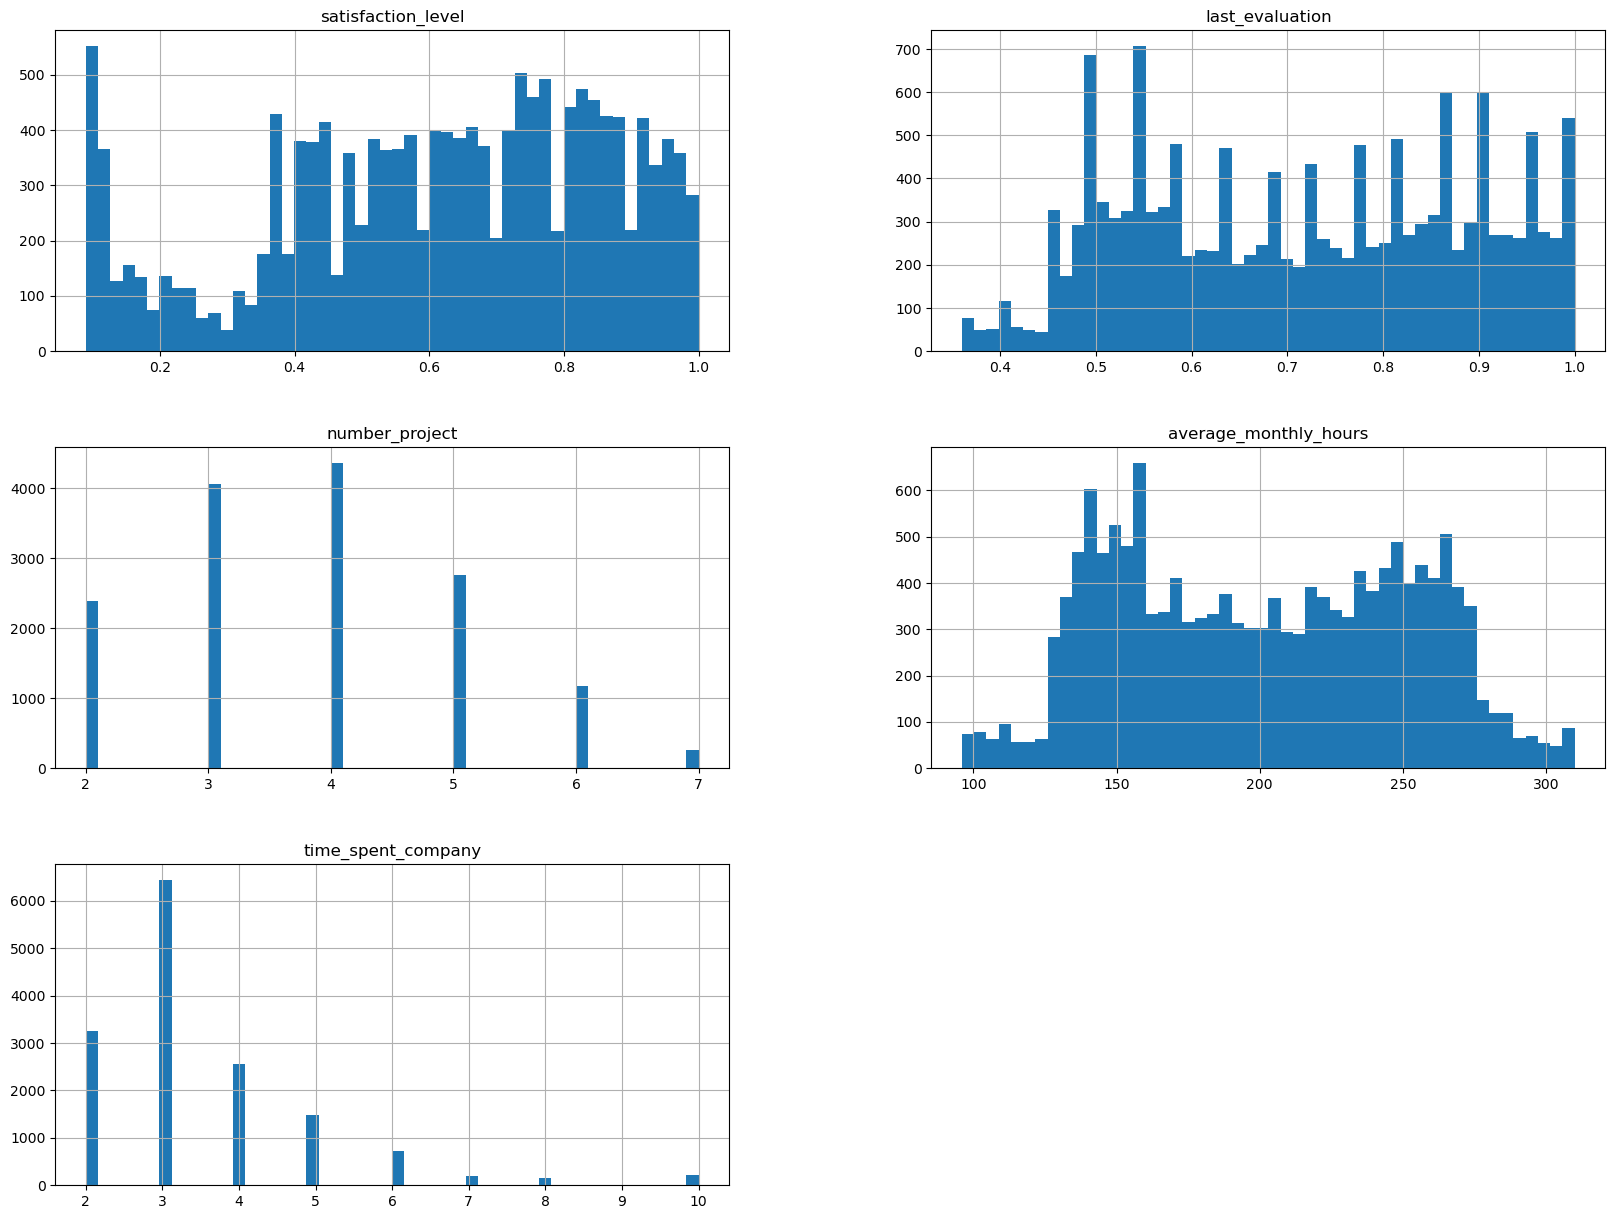

In [24]:
#visualize the numeric columns
%matplotlib inline
import matplotlib.pyplot as plt
humr_data.hist(bins=50, figsize=(20, 15))
plt.show()